In [114]:
import ehrdata as ehr
import numpy as np
import ehrapy as ep
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
adata = ehr.io.init_omop(folder_path="/Users/xinyuezhang/BlendedICU/BlendedICU/OMOP-CDM", delimiter=';', use_dask=False)

Checking if your data adheres to the OMOP Common Data Model (CDM) version 5.4 standards.


OMOP Database (OMOP-CDM) with 10 tables.
Clinical data tables: measurement, death, visit_occurrence, person, observation
Health system data tables: care_site, location
Vocabulary tables: source_to_concept_map, concept, domain

2024-03-01 11:43:28,620 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `328680` x `0`.


In [116]:
adata.obs['data_source'] = adata.obs['person_source_value'].str.split('-').str[0]
adata

AnnData object with n_obs × n_vars = 328680 × 0
    obs: 'visit_type_concept_id', 'gender_concept_id', 'person_source_value', 'visit_concept_id', 'person_id', 'birth_datetime', 'visit_start_date', 'visit_start_datetime', 'visit_source_value', 'gender_source_value', 'visit_end_date', 'admitted_from_source_value', 'discharged_to_source_value', 'year_of_birth', 'location_id', 'visit_end_datetime', 'data_source'
    var: 'ehrapy_column_type'
    uns: 'filepath_dict', 'tables', 'delimiter', 'use_dask'
    layers: 'original'

Couldn't find concept [44804452, 3711521] in concept table!

,feature_name,observation_concept_id,count
0,44804452,44804452,328680
1,3711521,3711521,328680
2,Body height,607590,328680


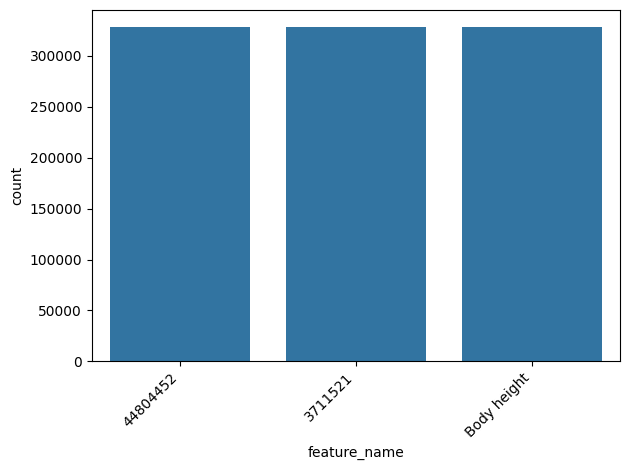

In [117]:
ehr.pl.feature_counts(adata, source='observation', number=20)

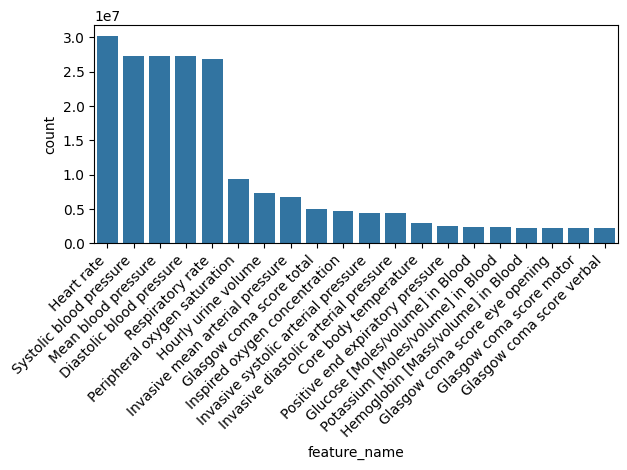

In [118]:
feature_count_df = ehr.pl.feature_counts(adata, source='measurement', number=20)

In [119]:
observation_features = ['Body weight']
measurement_features = feature_count_df.feature_name.tolist()

In [120]:
adata = ehr.pp.get_feature_statistics(adata, add_aggregation_to_X=True, aggregation_methods='mean', source='measurement', level='stay_level', features=measurement_features, verbose=True)

Detected: feature Heart rate, feature ID 4239408 in concept table, match ratio = 100.

Detected: feature Systolic blood pressure, feature ID 4152194 in concept table, match ratio = 100.

Detected: feature Mean blood pressure, feature ID 4239021 in concept table, match ratio = 100.

Detected: feature Diastolic blood pressure, feature ID 4154790 in concept table, match ratio = 100.

Detected: feature Respiratory rate, feature ID 4313591 in concept table, match ratio = 100.

Detected: feature Peripheral oxygen saturation, feature ID 4196147 in concept table, match ratio = 100.

Detected: feature Hourly urine volume, feature ID 4145209 in concept table, match ratio = 100.

Detected: feature Invasive mean arterial pressure, feature ID 4108290 in concept table, match ratio = 100.

Detected: feature Glasgow coma score total, feature ID 3007194 in concept table, match ratio = 100.

Detected: feature Inspired oxygen concentration, feature ID 4353936 in concept table, match ratio = 100.

Detected: feature Invasive systolic arterial pressure, feature ID 4353843 in concept table, match ratio = 100.

Detected: feature Invasive diastolic arterial pressure, feature ID 4354253 in concept table, match ratio = 100.

Detected: feature Core body temperature, feature ID 4174894 in concept table, match ratio = 100.

Detected: feature Positive end expiratory pressure, feature ID 4353713 in concept table, match ratio = 100.

Detected: feature Glucose [Moles/volume] in Blood, feature ID 3020491 in concept table, match ratio = 100.

Detected: feature Potassium [Moles/volume] in Blood, feature ID 3005456 in concept table, match ratio = 100.

Detected: feature Hemoglobin [Mass/volume] in Blood, feature ID 3000963 in concept table, match ratio = 100.

Detected: feature Glasgow coma score eye opening, feature ID 3016335 in concept table, match ratio = 100.

Detected: feature Glasgow coma score motor, feature ID 3008223 in concept table, match ratio = 100.

Detected: feature Glasgow coma score verbal, feature ID 3009094 in concept table, match ratio = 100.

2024-03-01 11:46:04,663 - root INFO - Added `['Heart rate_mean', 'Systolic blood pressure_mean', 'Mean blood pressure_mean', 'Diastolic blood pressure_mean', 'Respiratory rate_mean', 'Peripheral oxygen saturation_mean', 'Hourly urine volume_mean', 'Invasive mean arterial pressure_mean', 'Glasgow coma score total_mean', 'Inspired oxygen concentration_mean', 'Invasive systolic arterial pressure_mean', 'Invasive diastolic arterial pressure_mean', 'Core body temperature_mean', 'Positive end expiratory pressure_mean', 'Glucose [Moles/volume] in Blood_mean', 'Potassium [Moles/volume] in Blood_mean', 'Hemoglobin [Mass/volume] in Blood_mean', 'Glasgow coma score eye opening_mean', 'Glasgow coma score motor_mean', 'Glasgow coma score verbal_mean']` features to `X`.


In [121]:
adata

AnnData object with n_obs × n_vars = 328680 × 20
    obs: 'visit_type_concept_id', 'gender_concept_id', 'person_source_value', 'visit_concept_id', 'person_id', 'birth_datetime', 'visit_start_date', 'visit_start_datetime', 'visit_source_value', 'gender_source_value', 'visit_end_date', 'admitted_from_source_value', 'discharged_to_source_value', 'year_of_birth', 'location_id', 'visit_end_datetime', 'data_source'
    var: 'ehrapy_column_type'
    uns: 'filepath_dict', 'tables', 'delimiter', 'use_dask'

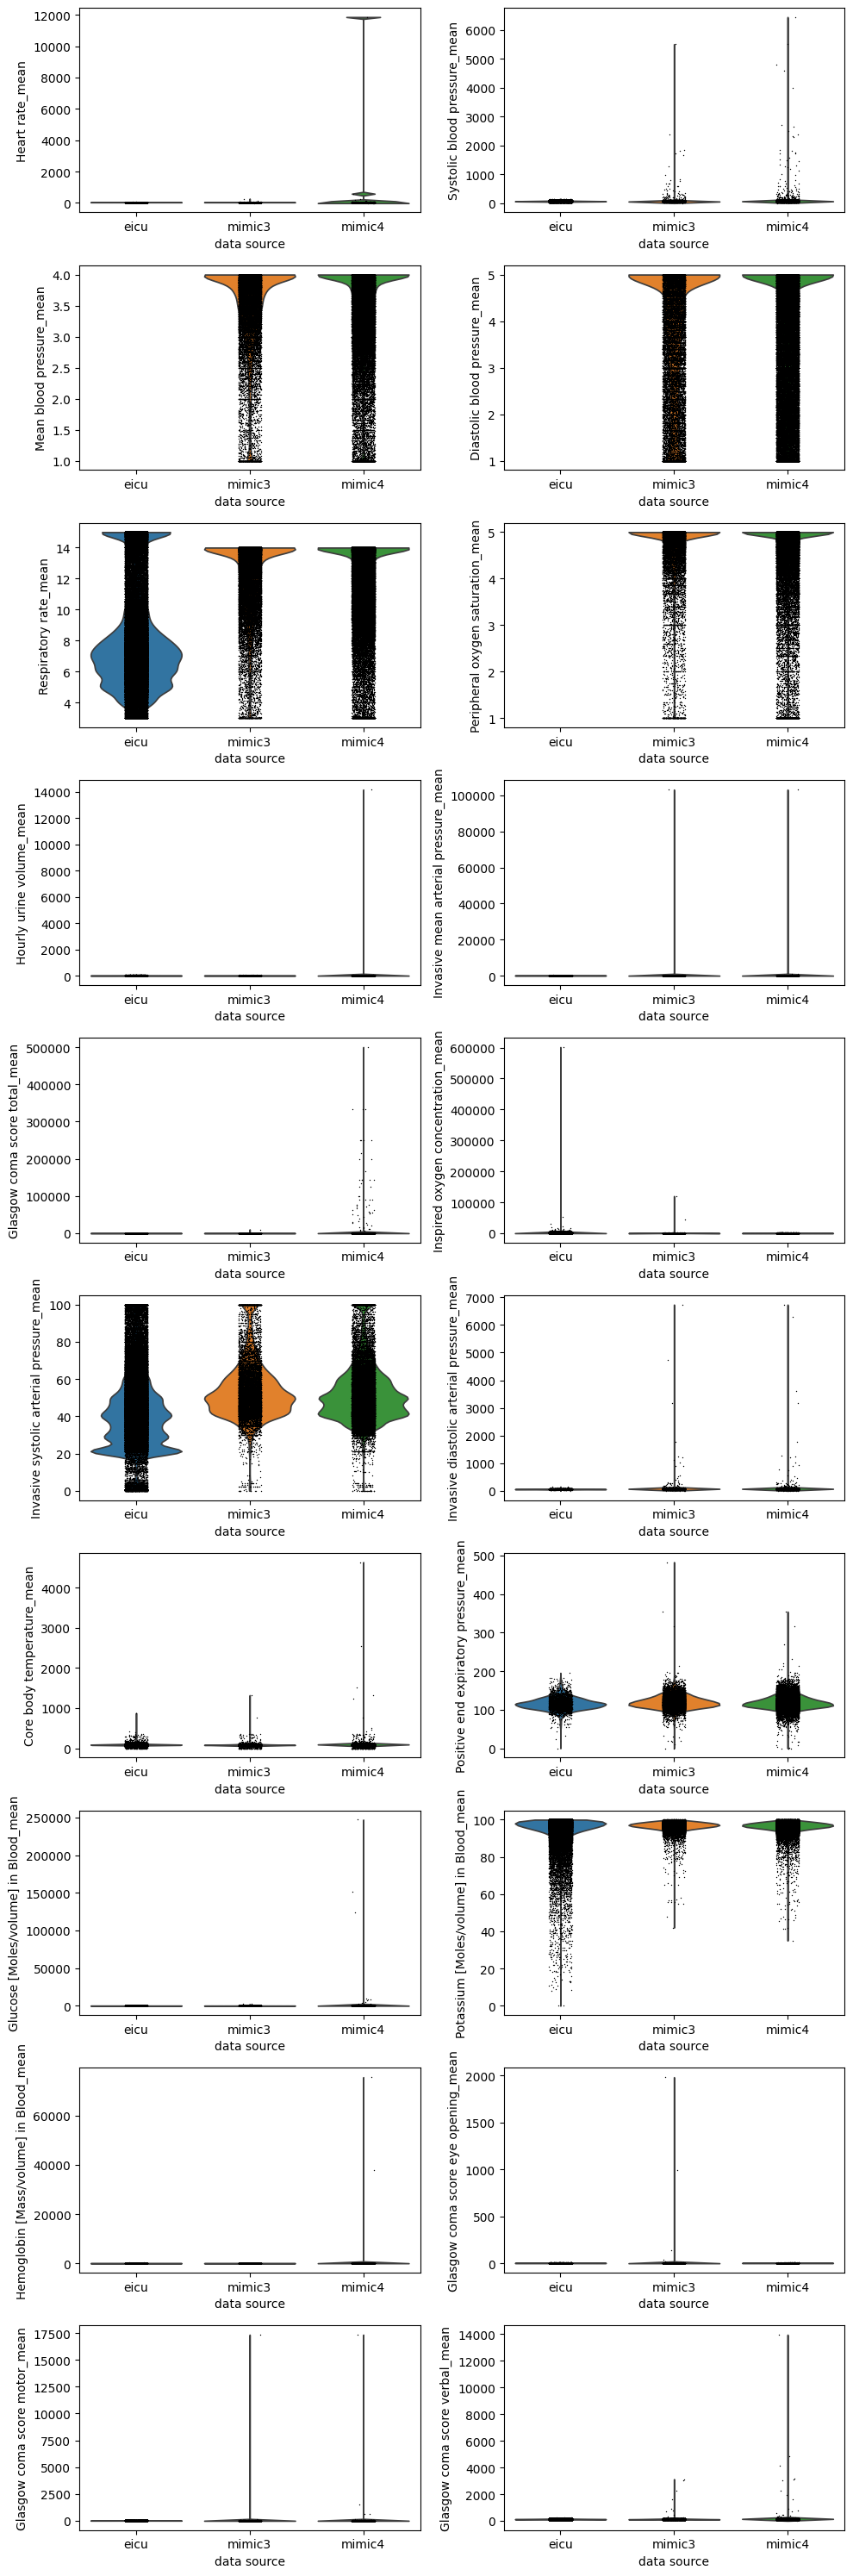

In [ ]:
#adata.X = adata.X.astype(float)
fig = plt.figure(figsize=(10, 30))
for i, variable in enumerate(measurement_features, start=1):
    ax = plt.subplot(10, 2, i)
    ehr.pl.violin(adata, keys=f'{variable}_mean', groupby='data_source', ax=ax, show=False)
fig.tight_layout()
plt.show()

In [77]:
measurements = ['Heart rate_mean',
 'Systolic blood pressure_mean',
  'Hourly urine volume_mean',
  'Invasive mean arterial pressure_mean',
  'Core body temperature_mean',
  'Glasgow coma score total_mean',
  'Glasgow coma score eye opening_mean',
 'Glasgow coma score motor_mean',
 'Glasgow coma score verbal_mean',
 'Invasive diastolic arterial pressure_mean',
 'Glucose [Moles/volume] in Blood_mean',
  ]
reference_table = pd.DataFrame(
    np.array(
        [
        "0-300",    # Heart rate_mean (beats per minute)
        "0-300",    # Systolic blood pressure_mean (mmHg)
        "0-2000",   # Hourly urine volume_mean (ml/hour) - to accommodate diuresis
        "0-500",    # Invasive mean arterial pressure_mean (mmHg)
        "0-500",    # Core body temperature_mean (°C) - accommodating hypothermia to hyperthermia
        "1-100",      
        "1-100",      
        "1-100",      
        "1-100",
        "0-500",    # Invasive diastolic arterial pressure_mean (mmHg)
        "0-400",     # Glucose [Moles/volume] in Blood_mean (mmol/L) - very wide to accommodate severe cases
        ]

    ),
    columns=["Traditional Reference Interval"],
    index=measurements,
)
reference_table

,Traditional Reference Interval
Heart rate_mean,0-300
Systolic blood pressure_mean,0-300
Hourly urine volume_mean,0-2000
Invasive mean arterial pressure_mean,0-500
Core body temperature_mean,0-500
Glasgow coma score total_mean,1-100
Glasgow coma score eye opening_mean,1-100
Glasgow coma score motor_mean,1-100
Glasgow coma score verbal_mean,1-100
Invasive diastolic arterial pressure_mean,0-500


In [78]:
ehr.pp.qc_lab_measurements(adata, measurements=measurements, reference_table=reference_table, verbose=True)

Detected Heart rate_mean for Heart rate_mean with score 100.

Using minimum of 0.0 and maximum of 300.0

Detected Systolic blood pressure_mean for Systolic blood pressure_mean with score 100.

Using minimum of 0.0 and maximum of 300.0

Detected Hourly urine volume_mean for Hourly urine volume_mean with score 100.

Using minimum of 0.0 and maximum of 2000.0

Detected Invasive mean arterial pressure_mean for Invasive mean arterial pressure_mean with score 100.

Using minimum of 0.0 and maximum of 500.0

Detected Core body temperature_mean for Core body temperature_mean with score 100.

Using minimum of 0.0 and maximum of 500.0

Detected Glasgow coma score total_mean for Glasgow coma score total_mean with score 100.

Using minimum of 1.0 and maximum of 100.0

Detected Glasgow coma score eye opening_mean for Glasgow coma score eye opening_mean with score 100.

Using minimum of 1.0 and maximum of 100.0

Detected Glasgow coma score motor_mean for Glasgow coma score motor_mean with score 100.

Using minimum of 1.0 and maximum of 100.0

Detected Glasgow coma score verbal_mean for Glasgow coma score verbal_mean with score 100.

Using minimum of 1.0 and maximum of 100.0

Detected Invasive diastolic arterial pressure_mean for Invasive diastolic arterial pressure_mean with score 100.

Using minimum of 0.0 and maximum of 500.0

Detected Glucose [Moles/volume] in Blood_mean for Glucose [Moles/volume] in Blood_mean with score 100.

Using minimum of 0.0 and maximum of 400.0

In [79]:
for measurement in measurements:
    adata = adata[adata.obs[f"{measurement} normal"]]

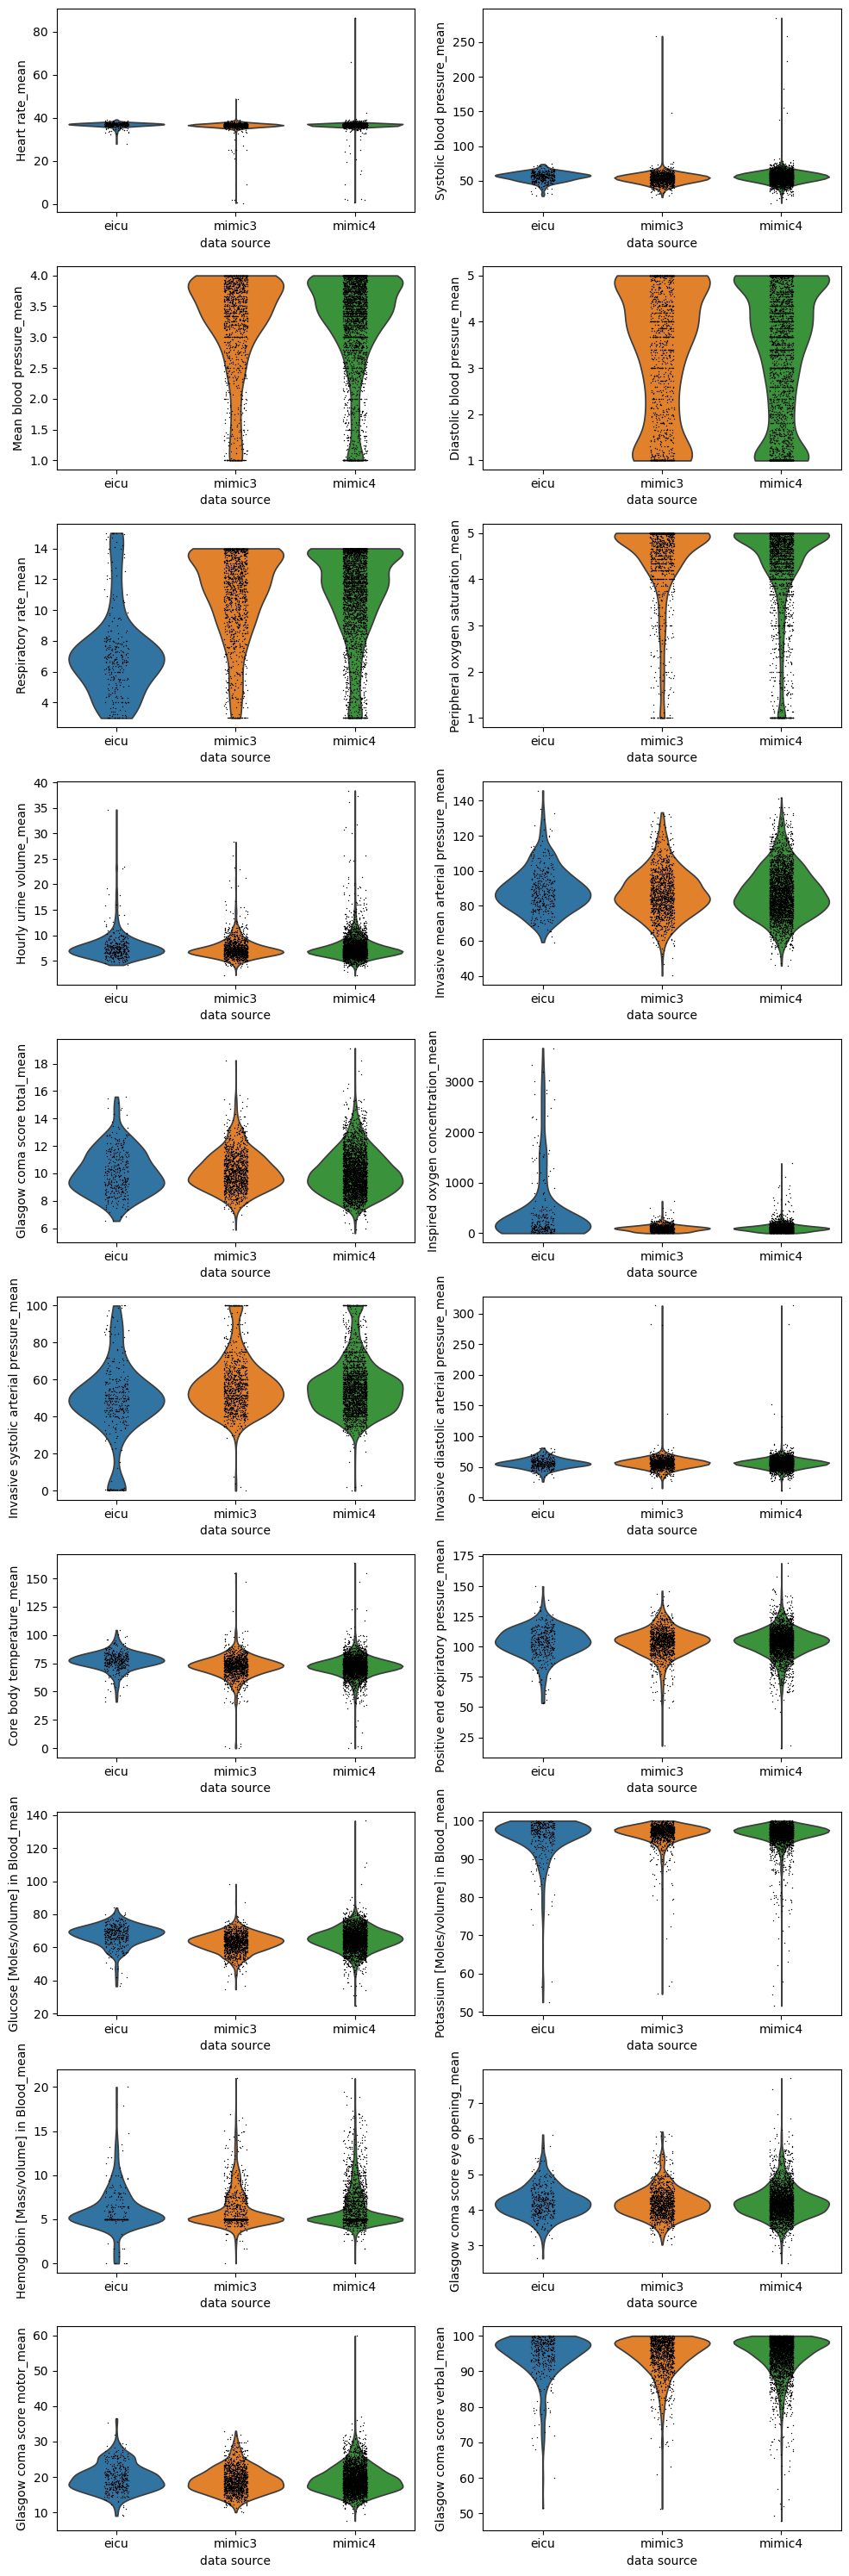

In [81]:
fig = plt.figure(figsize=(10, 30))
for i, variable in enumerate(measurement_features, start=1):
    ax = plt.subplot(10, 2, i)
    ehr.pl.violin(adata, keys=f'{variable}_mean', groupby='data_source', ax=ax, show=False)
fig.tight_layout()
plt.show()

<Axes: xlabel='nan_count_X', ylabel='Count'>

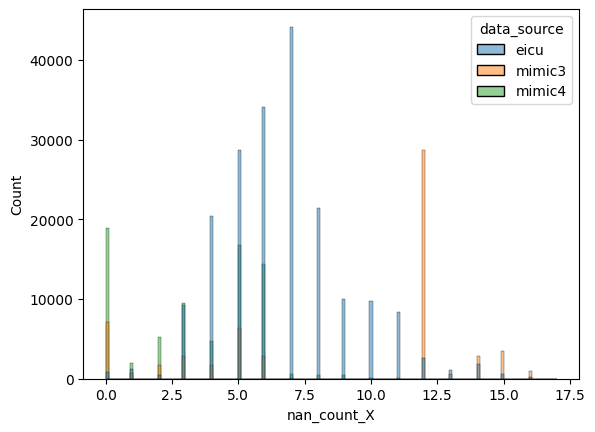

In [124]:
nan_count_list = np.sum(np.isnan(adata.X), axis=1).tolist()
adata.obs['nan_count_X'] = nan_count_list

sns.histplot(data=adata.obs, x = 'nan_count_X', hue='data_source')

remove these three features because eICU doesn't have these

In [123]:
adata = adata[:, ~adata.var_names.isin(['Mean blood pressure_mean', 'Diastolic blood pressure_mean', 'Peripheral oxygen saturation_mean'])]
adata.layers['original'] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 328680 × 17
    obs: 'visit_type_concept_id', 'gender_concept_id', 'person_source_value', 'visit_concept_id', 'person_id', 'birth_datetime', 'visit_start_date', 'visit_start_datetime', 'visit_source_value', 'gender_source_value', 'visit_end_date', 'admitted_from_source_value', 'discharged_to_source_value', 'year_of_birth', 'location_id', 'visit_end_datetime', 'data_source', 'nan_count_X'
    var: 'ehrapy_column_type'
    uns: 'filepath_dict', 'tables', 'delimiter', 'use_dask'
    layers: 'original'

## Using different Imputation Methods

In [128]:
adata.X = np.where(adata.X < 0, 0, adata.X)

Feature Positive end expiratory pressure_mean had more than 87.64% missing values!

Feature Core body temperature_mean had more than 75.10% missing values!

Feature Invasive diastolic arterial pressure_mean had more than 87.64% missing values!

Feature Hemoglobin [Mass/volume] in Blood_mean had more than 73.83% missing values!

Feature Heart rate_mean had more than 70.10% missing values!

2024-03-01 11:49:57,704 - root INFO - Values in columns ['Heart rate_mean', 'Systolic blood pressure_mean', 'Respiratory rate_mean', 'Hourly urine volume_mean', 'Invasive mean arterial pressure_mean', 'Glasgow coma score total_mean', 'Inspired oxygen concentration_mean', 'Invasive systolic arterial pressure_mean', 'Invasive diastolic arterial pressure_mean', 'Core body temperature_mean', 'Positive end expiratory pressure_mean', 'Glucose [Moles/volume] in Blood_mean', 'Potassium [Moles/volume] in Blood_mean', 'Hemoglobin [Mass/volume] in Blood_mean', 'Glasgow coma score eye opening_mean', 'Glasgow coma score motor_mean', 'Glasgow coma score verbal_mean'] were replaced by [[3.63558089 4.1708798  2.12212227 ... 1.67605757 3.24247574 4.87992422]
 [3.63558089 4.10144398 2.1654254  ... 1.57691475 2.94183651 4.9240957 ]
 [3.63558089 4.54043264 2.21920348 ... 1.56861591 2.95379358 5.13982893]
 ...
 [3.63172106 4.26619482 2.4510051  ... 1.5187836  2.8704616  4.89034913]
 [3.632652   4.39478277 

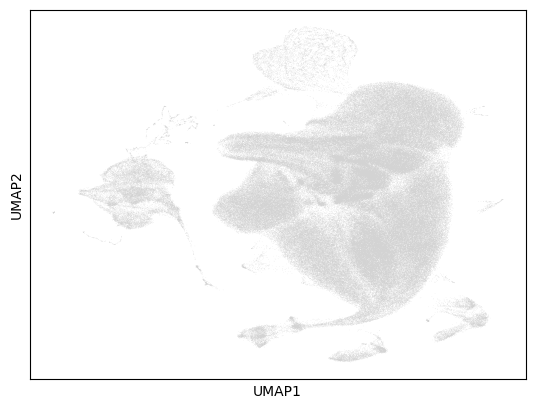

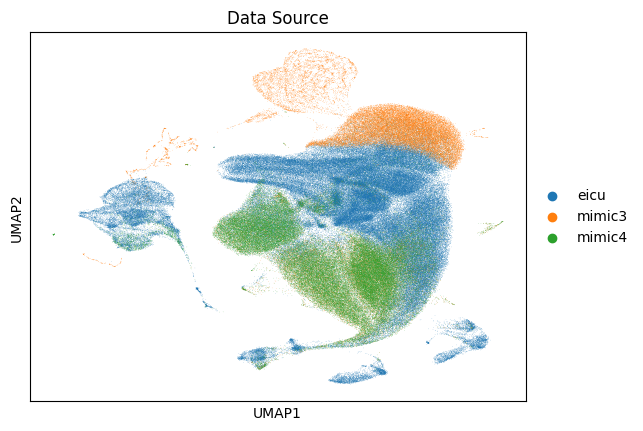

In [129]:
ep.pp.simple_impute(adata, strategy='mean')
ep.pp.log_norm(adata, offset=1)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.pl.umap(adata)
ep.pl.umap(adata, color=["data_source"], wspace=0.5, title=["Data Source"])

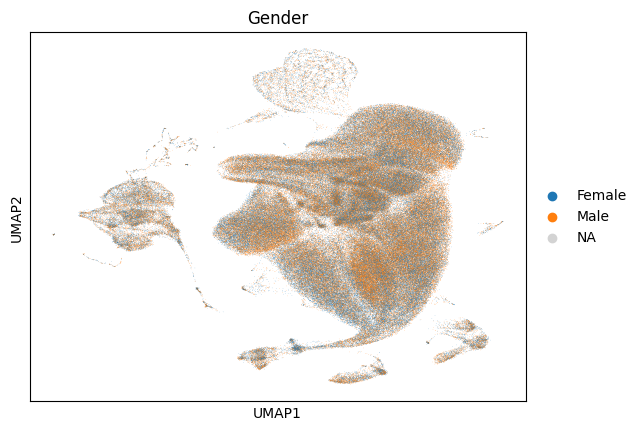

In [132]:
adata.obs['gender'] = adata.obs['gender_source_value'].map({0: 'Female', 1: "Male"})
ep.pl.umap(adata, color=["gender"], wspace=0.5, title=["Gender"])

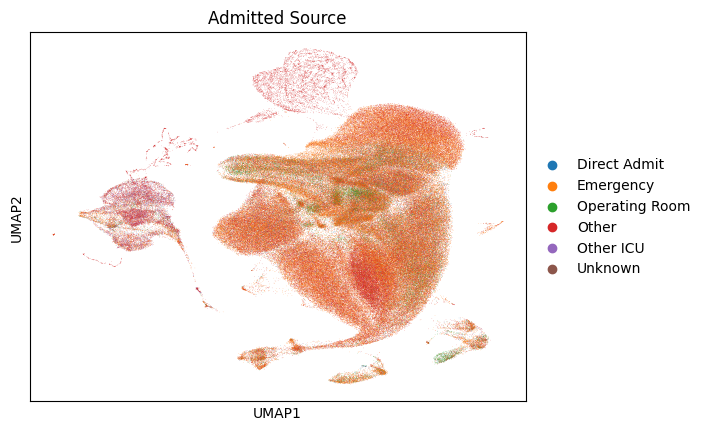

In [133]:
ep.pl.umap(adata, color=["admitted_from_source_value"], wspace=0.5, title=["Admitted Source"])

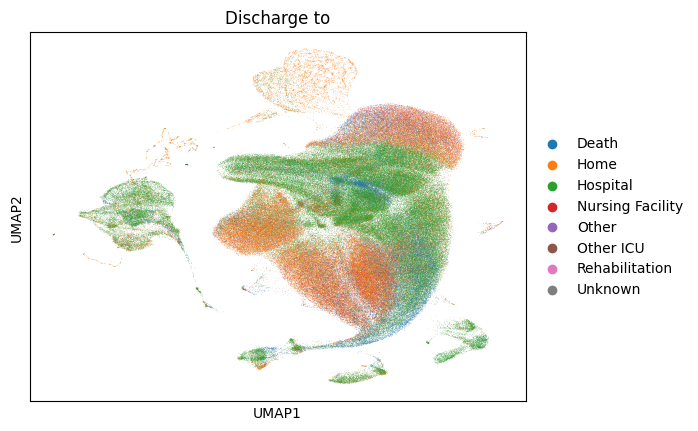

In [147]:
ep.pl.umap(adata, color=["discharged_to_source_value"], wspace=0.5, title=["Discharge to"])

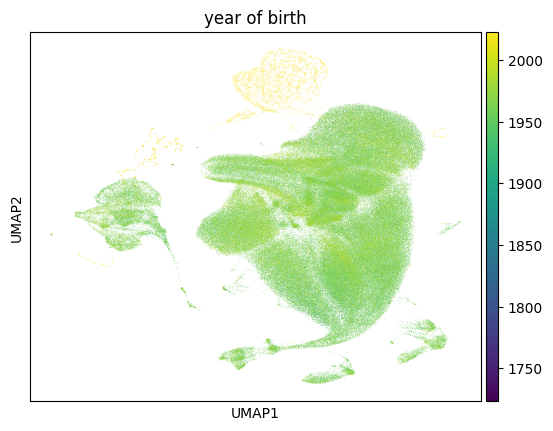

In [143]:
ep.pl.umap(adata, color=["year_of_birth"], wspace=0.5, title=["year of birth"])

In [149]:
adata.X = adata.layers['original']
adata.X = np.where(adata.X < 0, 0, adata.X)
ep.pp.explicit_impute(adata, replacement=0)
ep.pp.log_norm(adata, offset=1)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.pl.umap(adata)
ep.pl.umap(adata, color=["data_source"], wspace=0.5, title=["Data Source"])

Feature Positive end expiratory pressure_mean had more than 87.64% missing values!

Feature Core body temperature_mean had more than 75.10% missing values!

Feature Invasive diastolic arterial pressure_mean had more than 87.64% missing values!

Feature Hemoglobin [Mass/volume] in Blood_mean had more than 73.83% missing values!

Feature Heart rate_mean had more than 70.10% missing values!

2024-03-01 12:00:02,343 - root INFO - Values in columns ['Heart rate_mean', 'Systolic blood pressure_mean', 'Respiratory rate_mean', 'Hourly urine volume_mean', 'Invasive mean arterial pressure_mean', 'Glasgow coma score total_mean', 'Inspired oxygen concentration_mean', 'Invasive systolic arterial pressure_mean', 'Invasive diastolic arterial pressure_mean', 'Core body temperature_mean', 'Positive end expiratory pressure_mean', 'Glucose [Moles/volume] in Blood_mean', 'Potassium [Moles/volume] in Blood_mean', 'Hemoglobin [Mass/volume] in Blood_mean', 'Glasgow coma score eye opening_mean', 'Glasgow coma score motor_mean', 'Glasgow coma score verbal_mean'] were replaced by [[0.         4.1708798  2.12212227 ... 1.67605757 3.24247574 4.87992422]
 [0.         4.10144398 2.1654254  ... 1.57691475 2.94183651 4.9240957 ]
 [0.         4.54043264 2.21920348 ... 1.56861591 2.95379358 5.13982893]
 ...
 [3.63172106 4.26619482 2.4510051  ... 1.5187836  2.8704616  4.89034913]
 [3.632652   4.39478277 